In [1]:
from tree_sitter import Language, Parser
import networkx as nx
import matplotlib.pyplot as plt
from regraph import NXGraph, Rule
from regraph import plot_graph, plot_instance, plot_rule

In [2]:
code = """
import numpy as np

def perform_bernoulli_trials(n, p):

    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success
"""

In [3]:
code_2 = """
import numpy as np

def perform_bernoulli_trials(n, p):

    # Initialize number of successes: n_success
    n_success = 0

    return n_success
"""

-------------------------------

In [4]:
PY_LANGUAGE = Language('playground/parsers/build/my-languages.so', 'python')
python_parser = Parser()
python_parser.set_language(PY_LANGUAGE)

In [98]:
def parse_py(code):
    
    # get a tree
    tree = python_parser.parse(bytes(code, "utf8"))

    # traverse tree to get nodes & edges
    G = NXGraph()
    
    G = bfs_tree_traverser(tree.root_node, G)
    return G

In [108]:
def bfs_tree_traverser(root_node, G):
    # node_id = id of current node being traversed
    # parent_id = id of the parent of the current node
    node_id, parent_id = 0, 0
    # lists to queue the nodes in order and identify already visited nodes
    visited, queue = [], []

    visited.append(root_node)
    queue.append(root_node)

    # add root_node to the graph
    G.add_node(0, attrs={"type": root_node.type, "text": root_node.text})

    # loop to visit each node
    while queue:
        node = queue.pop(0)

        for child_node in node.children:
            if child_node not in visited:
                node_id += 1
                # add child node to graph
                G.add_node(node_id, attrs={"type": child_node.type, "text": child_node.text, "parent_id":parent_id})
                # add edge between parent_node and child_node
                G.add_edge(parent_id, node_id)

                visited.append(child_node)
                queue.append(child_node)

        # set parent_id to the id of the next node in queue
        parent_id = parent_id + 1

    return G

In [115]:
G = parse_py(code_2)
type(G)

regraph.backends.networkx.graphs.NXGraph

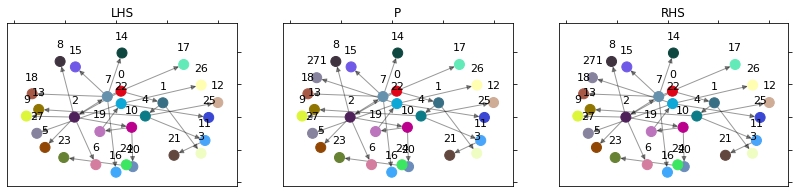

CLONE 27 AS 271.



In [122]:
pattern_from_graph = G
rule3 = Rule.from_transform(pattern_from_graph)
p_clone, rhs_clone = rule3.inject_clone_node(27)
plot_rule(rule3)
print(rule3.to_commands())

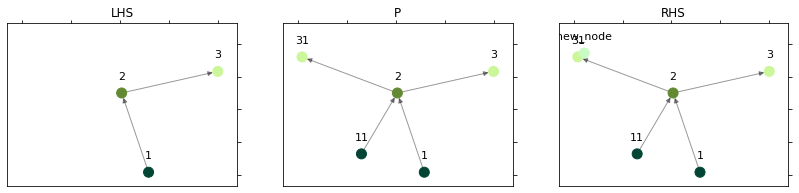

In [120]:
# Reproducing the tutorial
# Define the left-hand side of the rule
pattern = NXGraph()
pattern.add_nodes_from([1, 2, 3])
pattern.add_edges_from([(1, 2), (2, 3)])

rule1 = Rule.from_transform(pattern)
# `inject_clone_node` returns the IDs of the newly created
# clone in P and RHS
p_clone, rhs_clone = rule1.inject_clone_node(1)
p_clone, rhs_clone = rule1.inject_clone_node(3)
rule1.inject_add_node("new_node")
rule1.inject_add_edge("new_node", rhs_clone)
plot_rule(rule1)